<a href="https://colab.research.google.com/github/shanksghub/CNNs/blob/master/Football%20Neural%20Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import Callback
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import sklearn.model_selection
import sklearn.metrics
import sklearn.preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


In [202]:
url = 'https://raw.githubusercontent.com/shanksghub/FootballStats/master/FootballStats.csv'
df = pd.read_csv(url)

df = df.dropna(axis = 0, how ='any') 
df.fillna(0)

,name,position,appearances,goals,tackles,passes,assists,shots,hit woordwork,crosses,blocks,clearances,headed clearances,clean sheets,saves,punches,goals conceded,yellow cards,red cards,fouls,offsides
0,Sergio Agüero,Forward,23,17,16,538.0,6,84,5,7,20,3,0,0,0,0,3,0.0,15.0,18.0,0.0
1,Aymeric Laporte,Defender,27,2,30,2313.0,1,0,0,6,69,12,0,0,0,3,0,19.0,2.0,0.0,0.0
2,Mohamed Salah,Forward,26,17,13,739.0,7,87,1,49,21,4,1,0,0,0,0,0.0,0.0,20.0,21.0
3,Pierre-Emerick Aubameyang,Forward,25,15,19,518.0,4,63,3,26,13,15,4,0,0,0,0,0.0,0.0,11.0,17.0
4,Harry Kane,Forward,22,14,7,446.0,4,77,1,9,18,11,9,0,0,0,0,4.0,0.0,23.0,7.0
5,Eden Hazard,Forward,25,12,9,1273.0,10,67,1,75,27,4,1,0,0,0,0,2.0,0.0,10.0,7.0
8,Alexandre Lacazette,Forward,25,10,28,551.0,5,49,1,19,8,19,12,0,0,0,0,2.0,0.0,40.0,14.0
9,Aleksandar Mitrovic,Forward,27,10,18,744.0,2,93,3,5,21,47,42,0,0,0,0,6.0,0.0,40.0,28.0
10,Anthony Martial,Forward,20,9,7,569.0,2,30,0,31,7,7,3,0,0,0,0,2.0,0.0,13.0,5.0
18,Alisson,Goalkeeper,26,0,0,731.0,0,0,0,0,0,0,0,14,53,12,15,0.0,0.0,0.0,0.0


In [203]:

from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

In [204]:
df['position']= label_encoder.fit_transform(df['position']) 
  
df['position'].unique() 

array([1, 0, 2, 3])

In [205]:
y = df['position']
X = df[['shots', 'passes']]


In [206]:

scaler = StandardScaler()
X = scaler.fit_transform(X)
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_pred = y_test


In [207]:
X.shape[1:]

(2,)

In [208]:
# Model
model = Sequential()
model.add(Dense(36, input_shape=X.shape[1:], activation='relu'))
model.add(Dense(36, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_99 (Dense)             (None, 36)                108       
_________________________________________________________________
dense_100 (Dense)            (None, 36)                1332      
_________________________________________________________________
dense_101 (Dense)            (None, 1)                 37        
Total params: 1,477
Trainable params: 1,477
Non-trainable params: 0
_________________________________________________________________


In [209]:
import time

In [210]:
#logdir = f"logs/test_model_{int(time.time())}"
#tensorboard = keras.callbacks.TensorBoard(log_dir=logdir) #log_dir: the path of the directory where to save the log
                                                           #files to be parsed by TensorBoard.

In [211]:
train_history = model.fit(X_train, y_train, epochs=40, verbose=1, 
                                    validation_data=(X_test, y_test))

Epoch 1/40
1/1 [==============================] - 0s 124ms/step - loss: 0.5708 - accuracy: 0.3333 - val_loss: 0.6773 - val_accuracy: 0.4000
Epoch 2/40
1/1 [==============================] - 0s 18ms/step - loss: 0.5548 - accuracy: 0.3333 - val_loss: 0.6694 - val_accuracy: 0.4000
Epoch 3/40
1/1 [==============================] - 0s 17ms/step - loss: 0.5393 - accuracy: 0.3333 - val_loss: 0.6619 - val_accuracy: 0.4000
Epoch 4/40
1/1 [==============================] - 0s 19ms/step - loss: 0.5241 - accuracy: 0.3333 - val_loss: 0.6542 - val_accuracy: 0.4000
Epoch 5/40
1/1 [==============================] - 0s 19ms/step - loss: 0.5091 - accuracy: 0.3333 - val_loss: 0.6468 - val_accuracy: 0.4000
Epoch 6/40
1/1 [==============================] - 0s 19ms/step - loss: 0.4943 - accuracy: 0.3333 - val_loss: 0.6399 - val_accuracy: 0.4000
Epoch 7/40
1/1 [==============================] - 0s 19ms/step - loss: 0.4797 - accuracy: 0.3333 - val_loss: 0.6329 - val_accuracy: 0.4000
Epoch 8/40
1/1 [==========

In [212]:
df = pd.DataFrame(columns=('loss', 'loss_test'))  

loss = train_history.history['loss']
val_loss = train_history.history['val_loss']

df['loss'] = loss
df['loss_test'] = val_loss

In [213]:
print(train_history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [214]:
train_history.history


{'accuracy': [0.3333333432674408,
  0.3333333432674408,
  0.3333333432674408,
  0.3333333432674408,
  0.3333333432674408,
  0.3333333432674408,
  0.3333333432674408,
  0.3333333432674408,
  0.3333333432674408,
  0.3333333432674408,
  0.3333333432674408,
  0.3333333432674408,
  0.3333333432674408,
  0.3333333432674408,
  0.3333333432674408,
  0.3333333432674408,
  0.3333333432674408,
  0.3333333432674408,
  0.3333333432674408,
  0.3333333432674408,
  0.3333333432674408,
  0.3333333432674408,
  0.3333333432674408,
  0.3333333432674408,
  0.3333333432674408,
  0.3333333432674408,
  0.3333333432674408,
  0.3333333432674408,
  0.3333333432674408,
  0.3333333432674408,
  0.3333333432674408,
  0.3333333432674408,
  0.3333333432674408,
  0.3333333432674408,
  0.3333333432674408,
  0.3333333432674408,
  0.3333333432674408,
  0.3333333432674408,
  0.3333333432674408,
  0.3333333432674408],
 'loss': [0.5707798004150391,
  0.5547952651977539,
  0.5392729043960571,
  0.5240833759307861,
  0.5090671

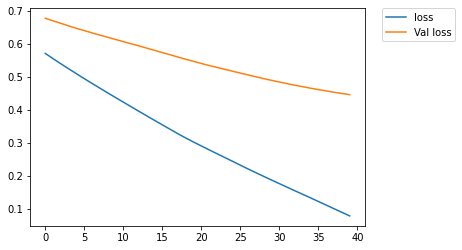

In [215]:

plt.plot(range(len(df['loss'])),df['loss'],label='loss')
plt.plot(range(len(df['loss'])),df['loss_test'],label='Val loss')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)